<a href="https://colab.research.google.com/github/ayush55-0/Bharat-Intern/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("/content/housing.csv")

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [11]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'], axis=1)
Y=data['median_house_value']

In [12]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [13]:
Y


0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [14]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [15]:
train_data=X_train.join(Y_train)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1156,-121.47,39.49,17.0,1554.0,242.0,553.0,230.0,3.2174,INLAND,91800.0
11041,-117.81,33.82,22.0,2898.0,335.0,1057.0,324.0,10.8111,<1H OCEAN,500001.0
15676,-122.43,37.80,52.0,2788.0,813.0,1302.0,764.0,4.1990,NEAR BAY,400000.0
18843,-122.90,41.46,31.0,1277.0,263.0,600.0,241.0,1.7292,INLAND,61700.0
9594,-120.46,37.33,17.0,6111.0,1171.0,2950.0,1104.0,3.2852,INLAND,98800.0
...,...,...,...,...,...,...,...,...,...,...
12124,-117.24,33.94,15.0,1569.0,423.0,1123.0,369.0,1.6111,INLAND,113900.0
865,-122.04,37.58,14.0,14917.0,2708.0,8012.0,2606.0,5.6277,NEAR BAY,269800.0
1736,-122.32,37.97,33.0,1156.0,190.0,643.0,209.0,4.5000,NEAR BAY,156600.0
2254,-119.81,36.80,29.0,2806.0,552.0,1242.0,540.0,3.5958,INLAND,88800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

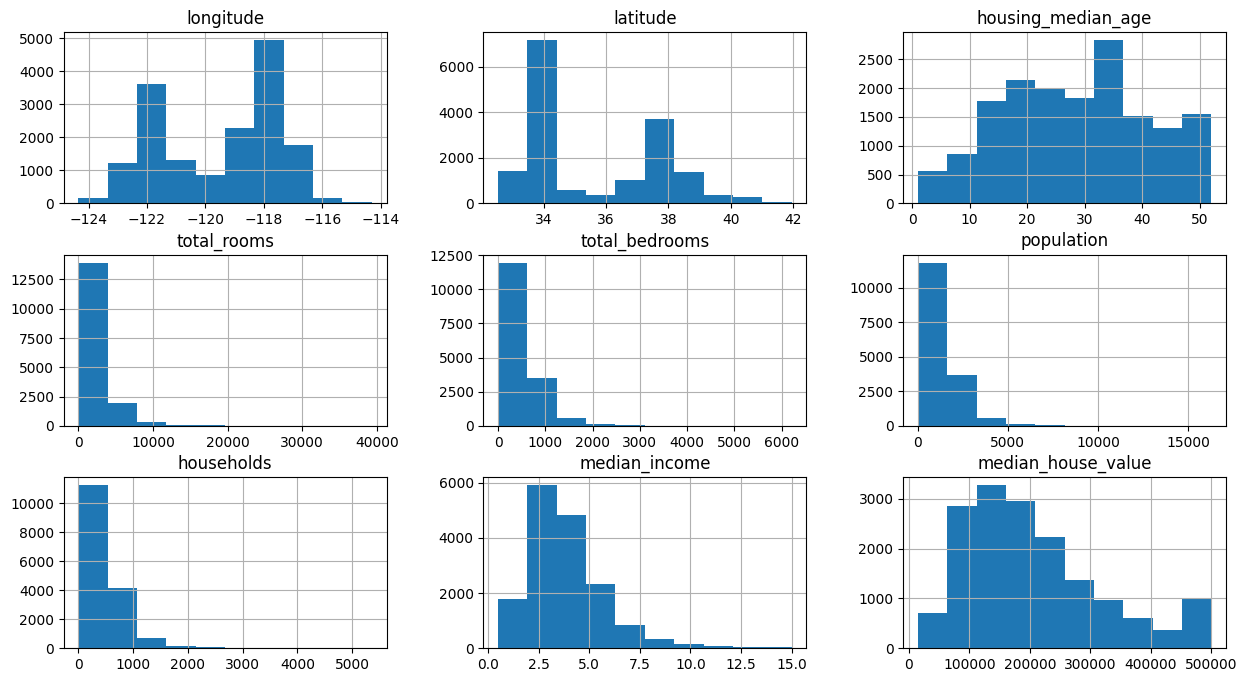

In [17]:
train_data.hist(figsize=(15,8))

<ipython-input-18-9ab4983852c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

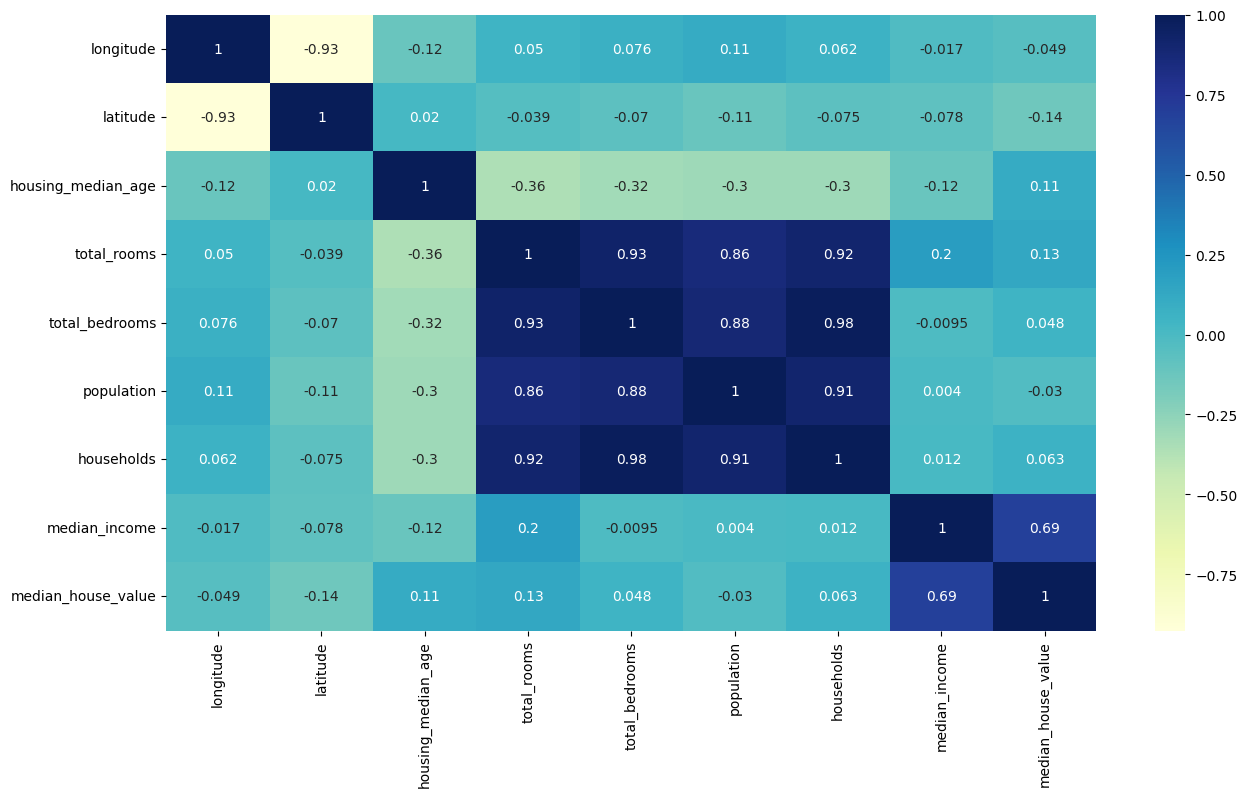

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [19]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

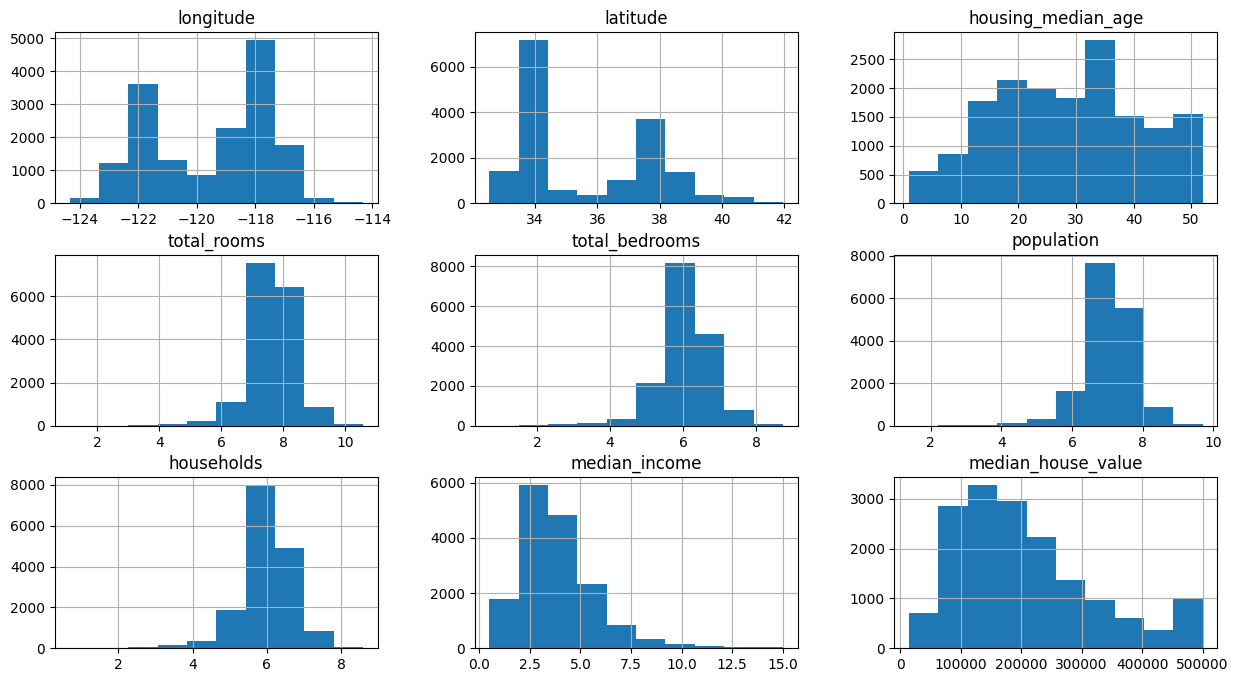

In [20]:
train_data.hist(figsize=(15,8))

In [21]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1156,-121.47,39.49,17.0,7.349231,5.493061,6.317165,5.442418,3.2174,91800.0,0,1,0,0,0
11041,-117.81,33.82,22.0,7.972121,5.817111,6.964136,5.783825,10.8111,500001.0,1,0,0,0,0
15676,-122.43,37.80,52.0,7.933438,6.701960,7.172425,6.639876,4.1990,400000.0,0,0,0,1,0
18843,-122.90,41.46,31.0,7.153052,5.575949,6.398595,5.488938,1.7292,61700.0,0,1,0,0,0
9594,-120.46,37.33,17.0,8.718009,7.066467,7.989899,7.007601,3.2852,98800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12124,-117.24,33.94,15.0,7.358831,6.049733,7.024649,5.913503,1.6111,113900.0,0,1,0,0,0
865,-122.04,37.58,14.0,9.610324,7.904335,8.988821,7.865955,5.6277,269800.0,0,0,0,1,0
1736,-122.32,37.97,33.0,7.053586,5.252273,6.467699,5.347108,4.5000,156600.0,0,0,0,1,0
2254,-119.81,36.80,29.0,7.939872,6.315358,7.125283,6.293419,3.5958,88800.0,0,1,0,0,0


<Axes: >

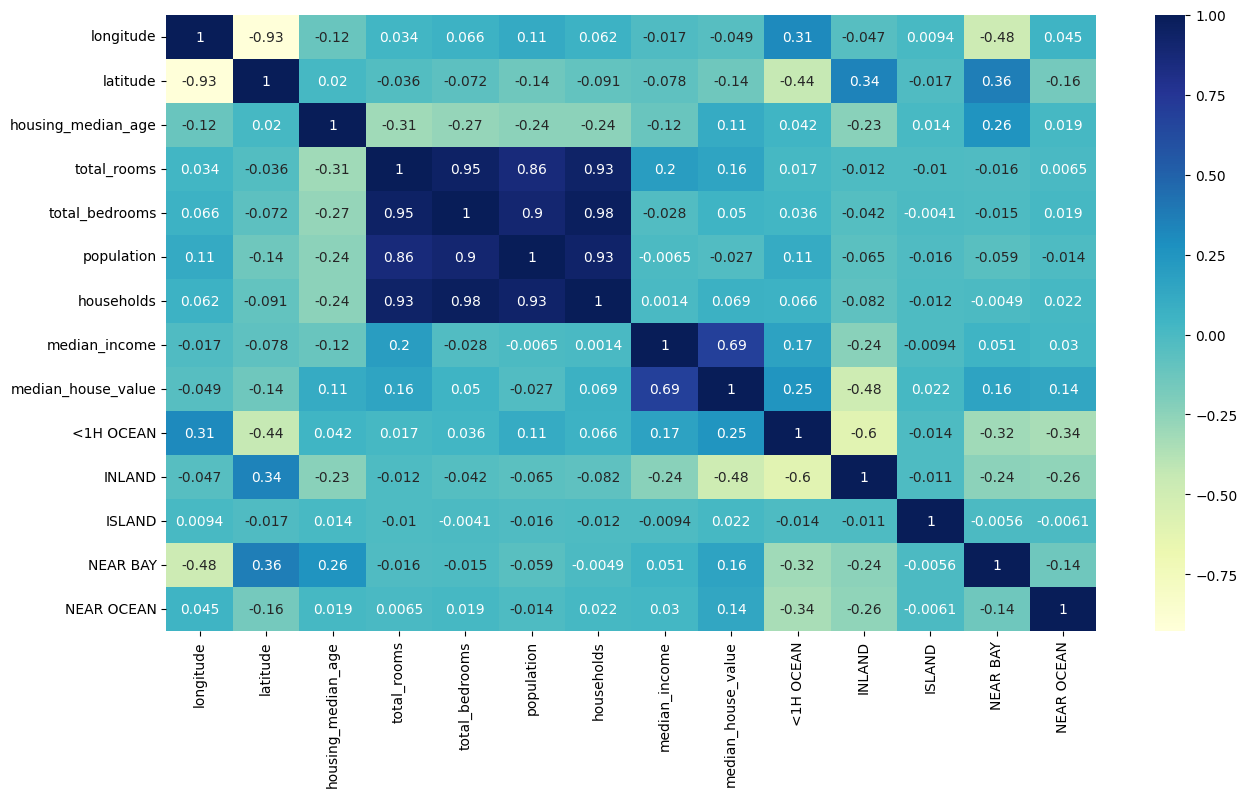

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

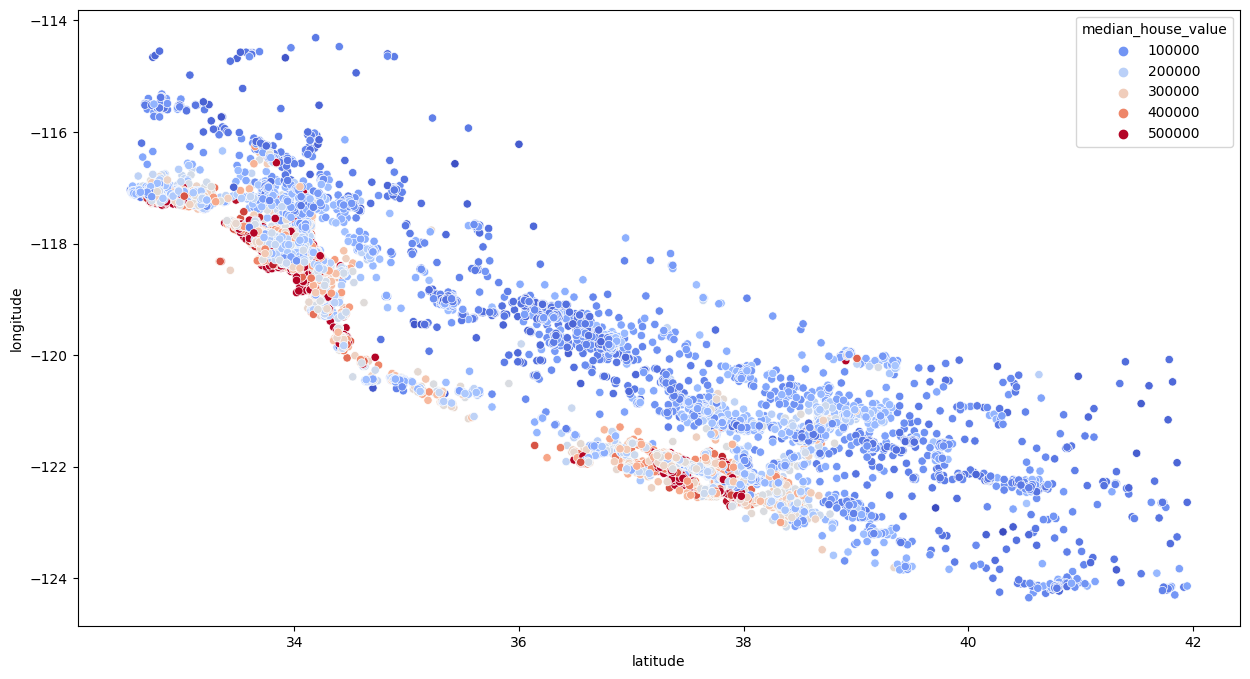

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [25]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

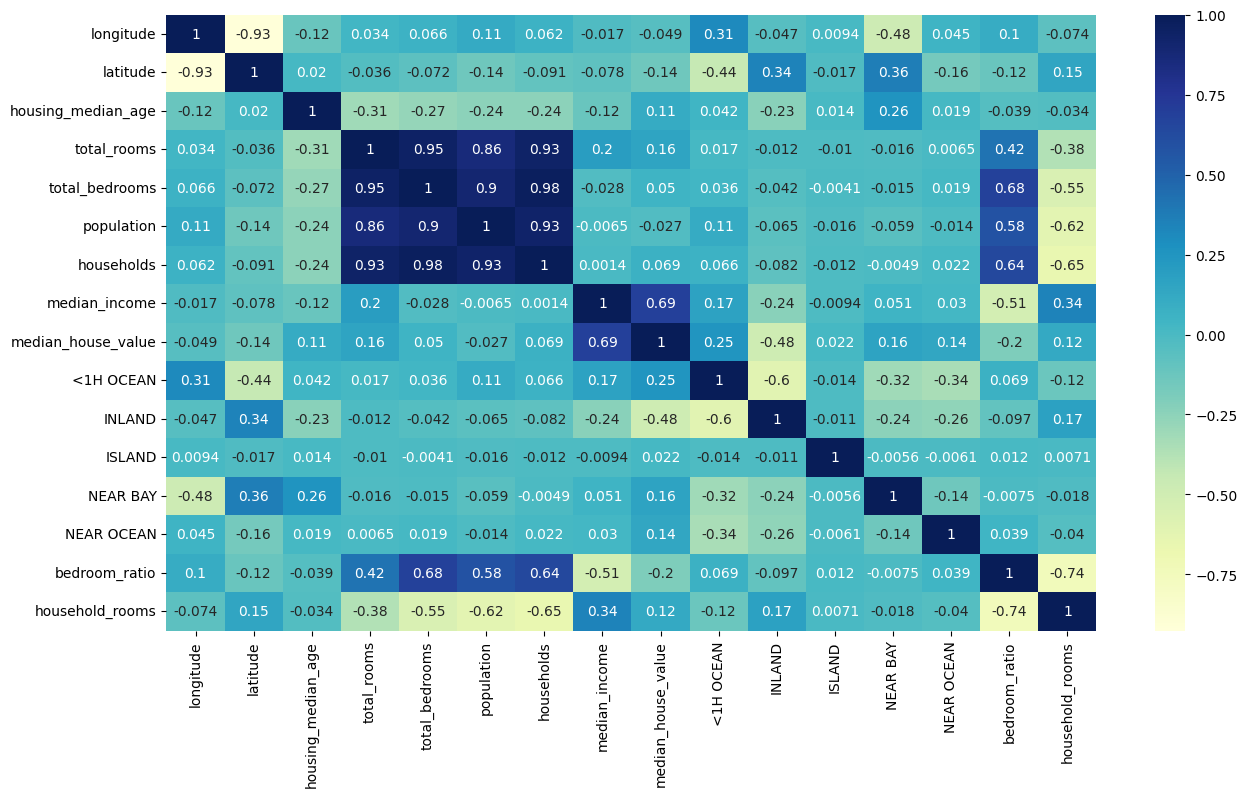

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train, Y_train =train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s=scaler.fit_transform(X_train)
reg=LinearRegression()
reg.fit(X_train_s, Y_train)

LinearRegression()

In [ ]:
test_data=X_test.join(Y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']


In [41]:
X_test, Y_test =test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [42]:
X_test_s=scaler.transform(X_test)

In [43]:
reg.score(X_test_s, Y_test)

0.6672760968134956

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [49]:
forest.score(X_test_s, Y_test)

0.8243338916069914

In [56]:
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor()
param_grid={
    "n_estimators":[100,200,300],
    "min_samples_split":[2, 4],
    "max_depth":[None, 4, 8]
}
grid_search=GridSearchCV(forest, param_grid, cv=5,
                         scoring="neg_mean_squared_error",
                         return_train_score=True)
grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [58]:
grid_search.best_estimator_.score(X_test_s, Y_test)

0.8251715841307359